In [2]:
import pandas as pd
from data_generator import ssp_data
import pickle
import pingouin as pg
import matplotlib.pyplot as plt

In [3]:
edge_weights = pd.read_csv('testfile.csv')
edge_weights

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,0.000000e+00,5.338000e-42,2.357000e-41,3.453800e-41,3.175600e-41,2.632900e-41,3.512400e-41,2.522000e-42,5.050000e-42,2.900300e-41,...,3.064200e-41,3.421000e-41,9.180000e-43,5.600000e-42,3.038700e-41,5.087000e-42,4.589000e-42,3.511500e-41,5.775000e-42,5.758000e-42
1,4.073283e-01,0.000000e+00,5.439200e-01,5.447364e-01,5.451564e-01,5.453011e-01,5.450186e-01,5.452551e-01,5.475196e-01,5.478400e-01,...,5.425078e-01,5.441657e-01,5.492853e-01,5.487148e-01,5.481977e-01,5.479668e-01,5.493665e-01,5.488079e-01,5.493523e-01,5.483762e-01
2,3.926615e-01,3.941118e-01,0.000000e+00,5.487021e-01,-2.010900e-41,-3.912700e-41,-1.050000e-41,-4.058700e-41,-3.115000e-41,-2.926000e-41,...,2.355000e-41,-2.546000e-41,-1.904100e-41,-2.656200e-41,-1.244400e-41,4.776000e-42,-3.918200e-41,-2.673400e-41,-3.562200e-41,-7.922000e-42
3,4.086474e-01,4.148795e-01,3.887935e-01,0.000000e+00,-3.331900e-41,3.792800e-41,9.320000e-43,2.702700e-41,1.145800e-41,3.225400e-41,...,3.453000e-42,-2.856700e-41,8.376000e-42,2.745300e-41,-3.196600e-41,1.043800e-41,-3.696000e-41,4.040800e-41,-3.495700e-41,2.930000e-42
4,3.858522e-01,3.860325e-01,3.834703e-01,3.923038e-01,0.000000e+00,1.164900e-41,1.398900e-41,1.823800e-41,6.240000e-42,5.046000e-42,...,8.373000e-42,9.298000e-42,8.355000e-42,1.504400e-41,2.660900e-41,-6.197000e-42,2.445400e-41,1.550800e-41,3.632300e-41,1.994900e-41
5,4.080060e-01,4.138214e-01,4.102202e-01,4.121164e-01,4.121470e-01,0.000000e+00,8.377000e-42,-2.440100e-41,-2.272600e-41,-2.936700e-41,...,-1.635200e-41,-1.009600e-41,-1.060900e-41,-2.262100e-41,-8.004000e-42,-1.752000e-41,-1.583000e-41,-2.251900e-41,-2.044000e-41,-1.897000e-41
6,4.111835e-01,4.121075e-01,4.044008e-01,4.123922e-01,2.708576e-03,1.752000e-41,0.000000e+00,-1.477700e-41,-1.284300e-41,3.402600e-41,...,3.946200e-41,2.061000e-42,3.065000e-42,1.956800e-41,2.303600e-41,7.526000e-42,1.966000e-42,-7.023000e-42,-3.069000e-42,2.545200e-41
7,1.823622e-02,1.105521e-02,1.033497e-02,1.786076e-02,1.340532e-02,2.529290e-09,4.821039e-26,0.000000e+00,-4.373000e-42,2.780000e-42,...,5.876269e-01,5.922173e-01,5.879982e-01,5.875885e-01,5.874700e-01,5.885029e-01,5.891271e-01,5.906144e-01,5.898081e-01,5.891779e-01
8,4.097807e-39,5.595524e-03,9.063873e-17,1.674791e-02,1.883777e-02,6.061584e-03,1.299600e-41,-3.278800e-41,0.000000e+00,5.917144e-01,...,5.892841e-01,5.910837e-01,5.891982e-01,5.902972e-01,5.910345e-01,5.902565e-01,5.911930e-01,5.908250e-01,2.167916e-01,3.225669e-01
9,1.231002e-02,-3.804283e-31,1.031150e-20,7.310610e-03,2.850125e-03,1.133823e-07,8.861552e-12,2.627387e-02,1.804977e-02,0.000000e+00,...,2.293872e-01,3.200573e-01,2.722288e-01,2.369823e-01,2.095436e-01,2.480564e-01,2.578547e-01,2.665071e-01,3.096915e-01,2.595941e-01


In [4]:
file = open("model_names.txt", "r") 
data = file.read() 
data_into_list = data.split("\n")
file.close() 

names = data_into_list
names.pop(0)
names

['ACCESS-ESM1-5',
 'AWI-CM-1-1-MR',
 'BCC-CSM2-MR',
 'CAMS-CSM1-0',
 'CanESM5 p1',
 'CanESM5 p2',
 'CanESM5-CanOE p2',
 'CESM2',
 'CESM2-WACCM',
 'CIESM',
 'CMCC-CM2-SR5',
 'CNRM-CM6-1 f2',
 'CNRM-CM6-1-HR f2',
 'CNRM-ESM2-1 f2',
 'EC-Earth3',
 'EC-Earth3-Veg',
 'FGOALS-f3-L',
 'FGOALS-g3',
 'FIO-ESM-2-0',
 'GFDL-CM4',
 'GFDL-ESM4',
 'GISS-E2-1-G p1',
 'GISS-E2-1-G p3',
 'HadGEM3-GC31-LL f3',
 'HadGEM3-GC31-MM f3',
 'INM-CM4-8',
 'INM-CM5-0',
 'IPSL-CM6A-LR',
 'KACE-1-0-G',
 'MCM-UA-1-0',
 'MIROC6',
 'MIROC-ES2L f2',
 'MPI-ESM1-2-HR',
 'MPI-ESM1-2-LR',
 'MRI-ESM2-0',
 'NESM3',
 'NorESM2-LM',
 'NorESM2-MM',
 'UKESM1-0-LL f2']

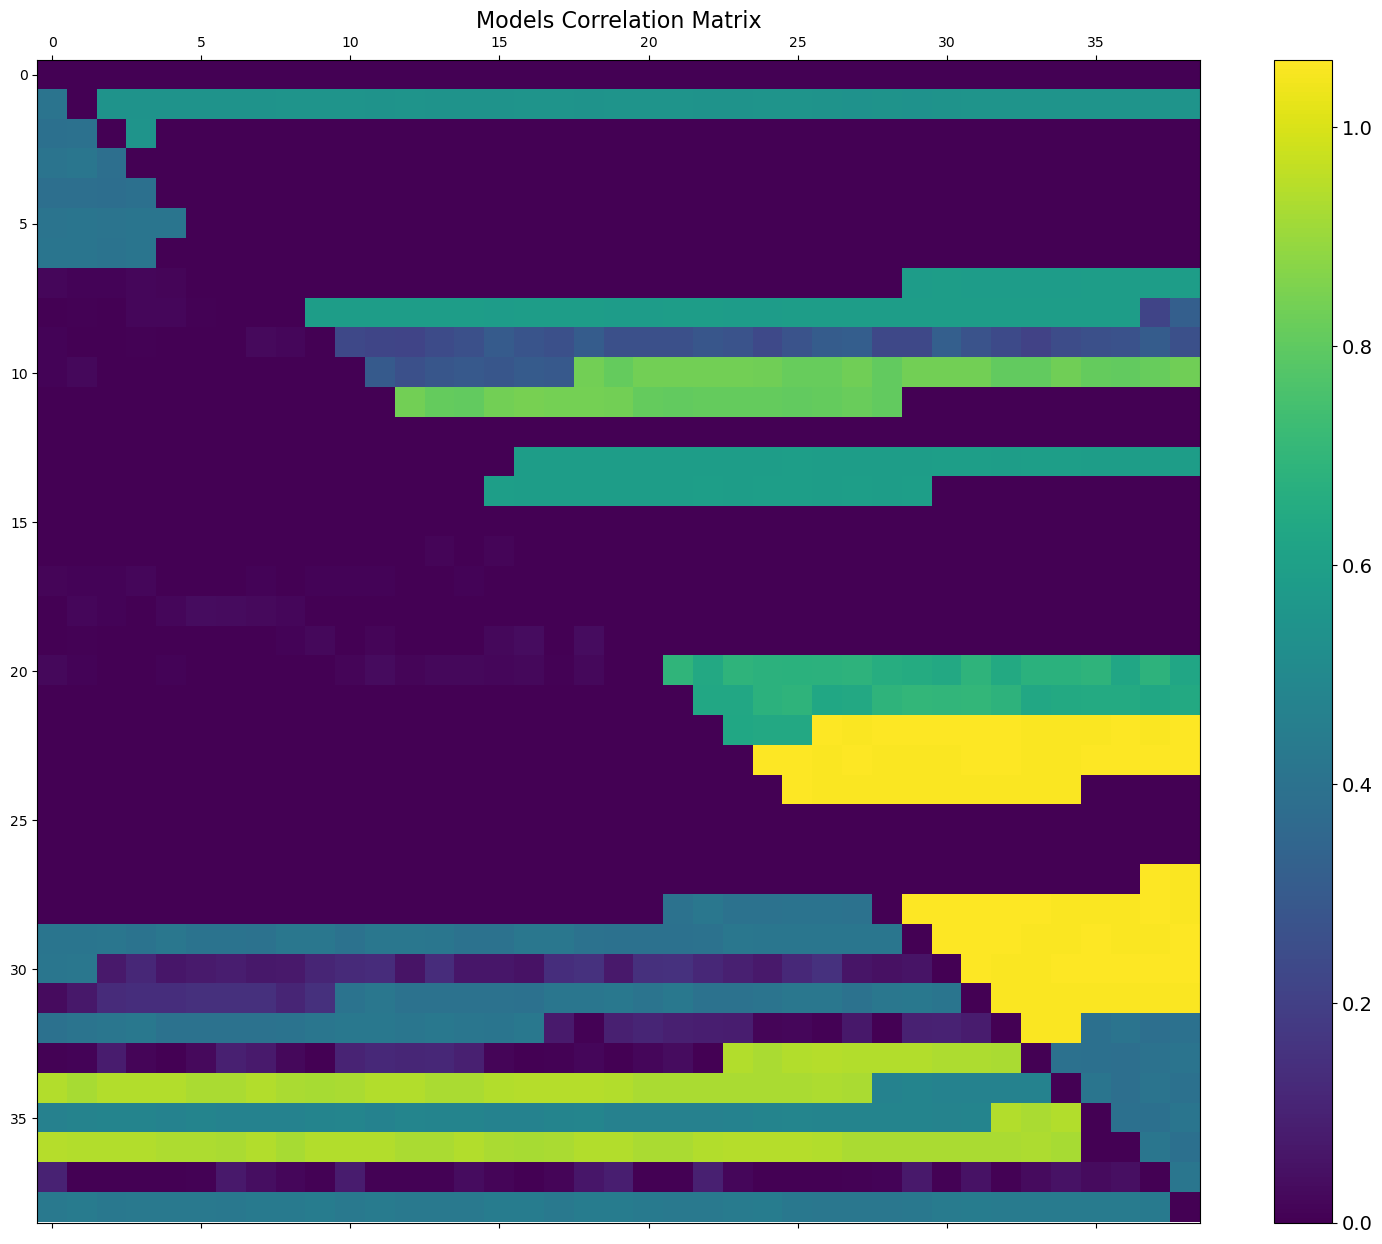

In [5]:
f = plt.figure(figsize=(19, 15))
plt.matshow(edge_weights, fignum=f.number)
# plt.xticks(range(corr.select_dtypes(['number']).shape[1]), corr.select_dtypes(['number']).columns, fontsize=14, rotation=45, ha='left')
# plt.yticks(range(corr.select_dtypes(['number']).shape[1]), corr.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Models Correlation Matrix', fontsize=16);

In [6]:
file = open('data_pickle', 'rb')
ssp_obj = pickle.load(file)
file.close()

In [7]:
df = ssp_obj.x
df

,time,lat,lon,tas,tas_2,tas_3,tas_4,tas_5,tas_6,tas_7,...,tas_30,tas_31,tas_32,tas_33,tas_34,tas_35,tas_36,tas_37,tas_38,tas_39
0,1961-01-16 12:00:00,-43.125,288.750,286.400269,280.862762,286.771332,285.407745,283.856293,284.691101,284.222473,...,282.111908,282.265228,281.129608,286.833252,285.880707,284.140472,284.725891,284.140472,285.263153,284.725891
1,1961-02-15 00:00:00,-43.125,288.750,285.905518,281.284271,281.414459,284.798828,283.674713,284.747620,284.870758,...,281.504333,282.548706,281.564545,286.903931,284.964691,286.738007,283.592102,286.738007,286.132538,283.592102
2,1961-03-16 12:00:00,-43.125,288.750,284.728638,283.605560,281.929413,282.059021,281.492584,282.372467,282.833374,...,279.986084,280.477509,280.007172,284.080078,285.290619,281.925079,281.761536,281.925079,287.348694,281.761536
3,1961-04-16 00:00:00,-43.125,288.750,280.983887,276.310425,279.923767,279.065002,278.729950,278.684601,278.864471,...,276.463318,277.716187,277.234680,280.085754,280.959534,280.333771,279.282410,280.333771,288.668671,279.282410
4,1961-05-16 12:00:00,-43.125,288.750,279.186432,272.765076,278.642639,275.679047,275.733490,275.873016,275.867615,...,274.361664,275.168488,276.429657,277.081879,278.714783,278.002899,275.879089,278.002899,289.741669,275.879089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148195,1979-08-16 12:00:00,-13.125,335.625,294.739410,295.901398,297.703033,296.290222,296.006287,296.114349,296.208649,...,297.537598,295.884766,296.006897,296.684509,295.838593,294.373749,295.813171,294.373749,296.948700,295.813171
148196,1979-09-16 00:00:00,-13.125,335.625,294.692566,295.707916,297.600006,296.493225,295.870270,295.974457,296.031311,...,297.362488,295.818451,295.926453,296.765686,295.840881,294.300812,295.637085,294.300812,297.087402,295.637085
148197,1979-10-16 12:00:00,-13.125,335.625,295.054901,296.138306,297.874847,296.958801,296.478088,296.565735,296.519348,...,297.990479,296.596130,296.481384,297.795013,296.184540,294.528290,296.202637,294.528290,297.274567,296.202637
148198,1979-11-16 00:00:00,-13.125,335.625,295.820404,297.221680,298.484406,297.945587,297.443146,297.509857,297.399323,...,298.557434,297.636230,297.550934,299.549622,297.094421,295.460297,296.916992,295.460297,297.539337,296.916992


In [8]:
df = df.drop(columns=['time', 'lat', 'lon'])
df

,tas,tas_2,tas_3,tas_4,tas_5,tas_6,tas_7,tas_8,tas_9,tas_10,...,tas_30,tas_31,tas_32,tas_33,tas_34,tas_35,tas_36,tas_37,tas_38,tas_39
0,286.400269,280.862762,286.771332,285.407745,283.856293,284.691101,284.222473,284.567688,282.495728,282.871368,...,282.111908,282.265228,281.129608,286.833252,285.880707,284.140472,284.725891,284.140472,285.263153,284.725891
1,285.905518,281.284271,281.414459,284.798828,283.674713,284.747620,284.870758,285.316010,283.352661,283.852448,...,281.504333,282.548706,281.564545,286.903931,284.964691,286.738007,283.592102,286.738007,286.132538,283.592102
2,284.728638,283.605560,281.929413,282.059021,281.492584,282.372467,282.833374,285.541168,283.984772,283.768555,...,279.986084,280.477509,280.007172,284.080078,285.290619,281.925079,281.761536,281.925079,287.348694,281.761536
3,280.983887,276.310425,279.923767,279.065002,278.729950,278.684601,278.864471,286.656097,285.306183,278.012451,...,276.463318,277.716187,277.234680,280.085754,280.959534,280.333771,279.282410,280.333771,288.668671,279.282410
4,279.186432,272.765076,278.642639,275.679047,275.733490,275.873016,275.867615,287.312958,286.494598,278.417572,...,274.361664,275.168488,276.429657,277.081879,278.714783,278.002899,275.879089,278.002899,289.741669,275.879089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148195,294.739410,295.901398,297.703033,296.290222,296.006287,296.114349,296.208649,296.394745,296.033600,296.143219,...,297.537598,295.884766,296.006897,296.684509,295.838593,294.373749,295.813171,294.373749,296.948700,295.813171
148196,294.692566,295.707916,297.600006,296.493225,295.870270,295.974457,296.031311,296.582794,296.217438,296.056213,...,297.362488,295.818451,295.926453,296.765686,295.840881,294.300812,295.637085,294.300812,297.087402,295.637085
148197,295.054901,296.138306,297.874847,296.958801,296.478088,296.565735,296.519348,296.831482,296.465942,296.557983,...,297.990479,296.596130,296.481384,297.795013,296.184540,294.528290,296.202637,294.528290,297.274567,296.202637
148198,295.820404,297.221680,298.484406,297.945587,297.443146,297.509857,297.399323,297.165375,296.805939,297.560577,...,298.557434,297.636230,297.550934,299.549622,297.094421,295.460297,296.916992,295.460297,297.539337,296.916992


In [9]:
df.columns = names
df

,ACCESS-ESM1-5,AWI-CM-1-1-MR,BCC-CSM2-MR,CAMS-CSM1-0,CanESM5 p1,CanESM5 p2,CanESM5-CanOE p2,CESM2,CESM2-WACCM,CIESM,...,MCM-UA-1-0,MIROC6,MIROC-ES2L f2,MPI-ESM1-2-HR,MPI-ESM1-2-LR,MRI-ESM2-0,NESM3,NorESM2-LM,NorESM2-MM,UKESM1-0-LL f2
0,286.400269,280.862762,286.771332,285.407745,283.856293,284.691101,284.222473,284.567688,282.495728,282.871368,...,282.111908,282.265228,281.129608,286.833252,285.880707,284.140472,284.725891,284.140472,285.263153,284.725891
1,285.905518,281.284271,281.414459,284.798828,283.674713,284.747620,284.870758,285.316010,283.352661,283.852448,...,281.504333,282.548706,281.564545,286.903931,284.964691,286.738007,283.592102,286.738007,286.132538,283.592102
2,284.728638,283.605560,281.929413,282.059021,281.492584,282.372467,282.833374,285.541168,283.984772,283.768555,...,279.986084,280.477509,280.007172,284.080078,285.290619,281.925079,281.761536,281.925079,287.348694,281.761536
3,280.983887,276.310425,279.923767,279.065002,278.729950,278.684601,278.864471,286.656097,285.306183,278.012451,...,276.463318,277.716187,277.234680,280.085754,280.959534,280.333771,279.282410,280.333771,288.668671,279.282410
4,279.186432,272.765076,278.642639,275.679047,275.733490,275.873016,275.867615,287.312958,286.494598,278.417572,...,274.361664,275.168488,276.429657,277.081879,278.714783,278.002899,275.879089,278.002899,289.741669,275.879089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148195,294.739410,295.901398,297.703033,296.290222,296.006287,296.114349,296.208649,296.394745,296.033600,296.143219,...,297.537598,295.884766,296.006897,296.684509,295.838593,294.373749,295.813171,294.373749,296.948700,295.813171
148196,294.692566,295.707916,297.600006,296.493225,295.870270,295.974457,296.031311,296.582794,296.217438,296.056213,...,297.362488,295.818451,295.926453,296.765686,295.840881,294.300812,295.637085,294.300812,297.087402,295.637085
148197,295.054901,296.138306,297.874847,296.958801,296.478088,296.565735,296.519348,296.831482,296.465942,296.557983,...,297.990479,296.596130,296.481384,297.795013,296.184540,294.528290,296.202637,294.528290,297.274567,296.202637
148198,295.820404,297.221680,298.484406,297.945587,297.443146,297.509857,297.399323,297.165375,296.805939,297.560577,...,298.557434,297.636230,297.550934,299.549622,297.094421,295.460297,296.916992,295.460297,297.539337,296.916992


In [10]:
pcorr = pg.pcorr(df)
pcorr

,ACCESS-ESM1-5,AWI-CM-1-1-MR,BCC-CSM2-MR,CAMS-CSM1-0,CanESM5 p1,CanESM5 p2,CanESM5-CanOE p2,CESM2,CESM2-WACCM,CIESM,...,MCM-UA-1-0,MIROC6,MIROC-ES2L f2,MPI-ESM1-2-HR,MPI-ESM1-2-LR,MRI-ESM2-0,NESM3,NorESM2-LM,NorESM2-MM,UKESM1-0-LL f2
ACCESS-ESM1-5,1.000000,0.030663,0.009489,0.111467,0.042165,-0.053339,0.073495,0.008960,-0.007757,0.110554,...,-0.102829,-0.010079,0.060488,0.149576,-0.096548,-0.064912,0.105794,-0.064912,-0.002232,0.105794
AWI-CM-1-1-MR,0.030663,1.000000,0.106034,0.064732,-0.005895,0.012832,0.008879,0.001957,0.000830,-0.033587,...,0.368833,0.006521,0.052915,-0.064552,-0.019071,0.055473,0.068729,0.055473,-0.004588,0.068729
BCC-CSM2-MR,0.009489,0.106034,1.000000,0.246210,-0.045212,0.055317,-0.012051,0.009075,-0.018642,-0.038252,...,-0.048790,0.152916,-0.045596,-0.014396,-0.059516,0.040594,0.054272,0.040594,0.018392,0.054272
CAMS-CSM1-0,0.111467,0.064732,0.246210,1.000000,0.011640,-0.005612,-0.011565,-0.000739,0.002676,-0.017026,...,0.150480,-0.011529,0.093006,0.124775,0.114989,0.101709,0.022643,0.101709,-0.006988,0.022643
CanESM5 p1,0.042165,-0.005895,-0.045212,0.011640,1.000000,0.429557,0.070269,-0.000949,0.001714,-0.002971,...,-0.020602,0.051719,-0.017768,-0.083928,0.030530,0.027469,-0.001886,0.027469,-0.001935,-0.001886
CanESM5 p2,-0.053339,0.012832,0.055317,-0.005612,0.429557,1.000000,0.843818,0.005330,-0.005697,0.025127,...,-0.008145,-0.013279,-0.014640,0.055391,0.017298,-0.049069,0.012519,-0.049069,-0.000990,0.012519
CanESM5-CanOE p2,0.073495,0.008879,-0.012051,-0.011565,0.070269,0.843818,1.000000,-0.008715,0.008838,-0.022621,...,0.002396,-0.007117,0.010148,-0.039756,-0.025608,0.009730,0.047278,0.009730,0.001322,0.047278
CESM2,0.008960,0.001957,0.009075,-0.000739,-0.000949,0.005330,-0.008715,1.000000,0.863807,-0.008983,...,-0.015789,-0.027513,0.000509,0.001234,0.003666,-0.006528,0.011436,-0.006528,0.273802,0.011436
CESM2-WACCM,-0.007757,0.000830,-0.018642,0.002676,0.001714,-0.005697,0.008838,0.863807,1.000000,0.008387,...,0.017466,0.023857,-0.001457,0.000857,-0.003656,0.004783,-0.009243,0.004783,0.212676,-0.009243
CIESM,0.110554,-0.033587,-0.038252,-0.017026,-0.002971,0.025127,-0.022621,-0.008983,0.008387,1.000000,...,0.057150,0.055572,-0.035864,0.069350,0.145697,0.028415,-0.138067,0.028415,0.001862,-0.138067


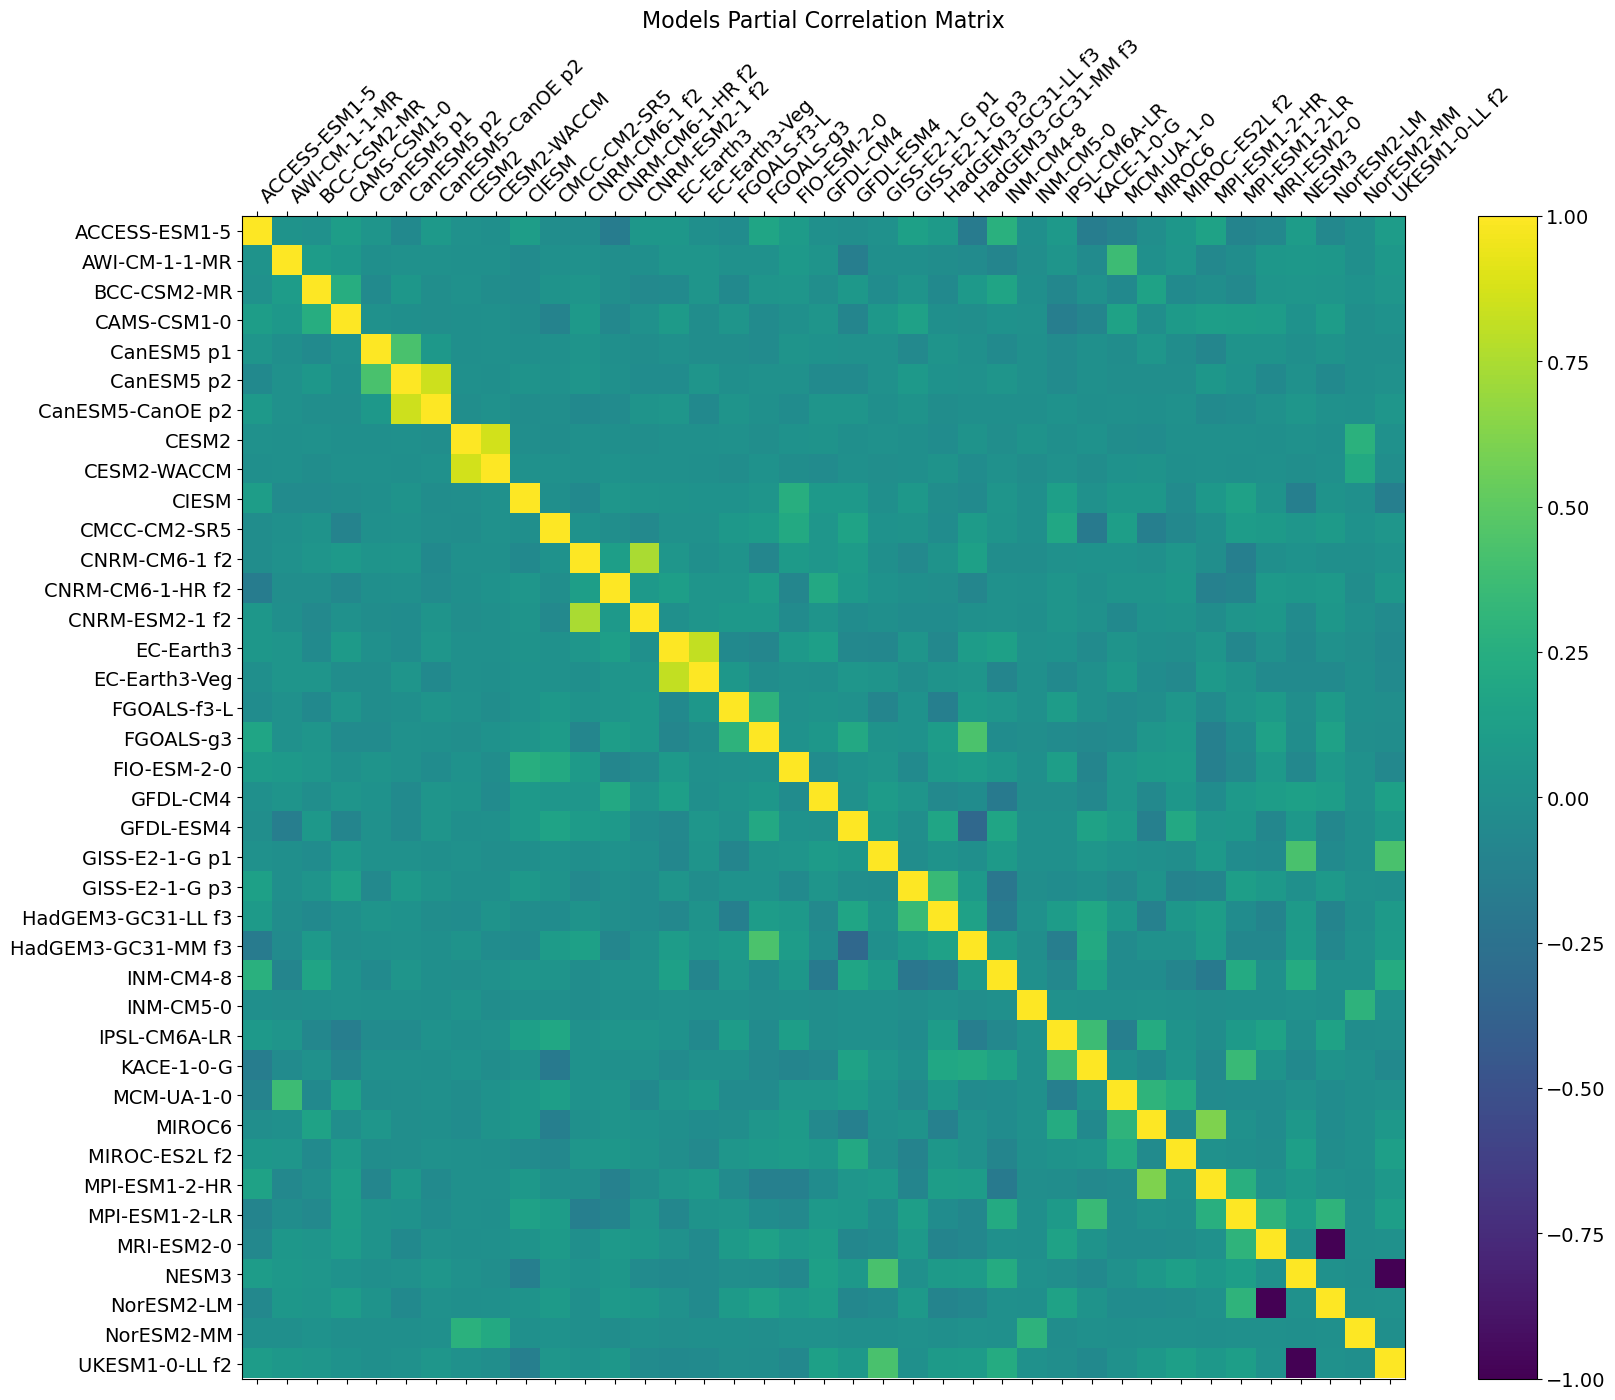

In [11]:
f = plt.figure(figsize=(19, 15))
plt.matshow(pcorr, fignum=f.number)
plt.xticks(range(pcorr.select_dtypes(['number']).shape[1]), pcorr.select_dtypes(['number']).columns, fontsize=14, rotation=45, ha='left')
plt.yticks(range(pcorr.select_dtypes(['number']).shape[1]), pcorr.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Models Partial Correlation Matrix', fontsize=16);

In [13]:
corr =df.corr()
corr

,ACCESS-ESM1-5,AWI-CM-1-1-MR,BCC-CSM2-MR,CAMS-CSM1-0,CanESM5 p1,CanESM5 p2,CanESM5-CanOE p2,CESM2,CESM2-WACCM,CIESM,...,MCM-UA-1-0,MIROC6,MIROC-ES2L f2,MPI-ESM1-2-HR,MPI-ESM1-2-LR,MRI-ESM2-0,NESM3,NorESM2-LM,NorESM2-MM,UKESM1-0-LL f2
ACCESS-ESM1-5,1.000000,0.940150,0.956417,0.962597,0.963823,0.966855,0.966918,0.001626,-0.000877,0.957152,...,0.942240,0.945776,0.950321,0.941929,0.938558,0.938271,0.973448,0.938271,0.003877,0.973448
AWI-CM-1-1-MR,0.940150,1.000000,0.946392,0.962693,0.929142,0.932733,0.931882,0.003587,0.001466,0.938501,...,0.972677,0.946215,0.946266,0.928698,0.896442,0.926756,0.943127,0.926756,0.004931,0.943127
BCC-CSM2-MR,0.956417,0.946392,1.000000,0.966087,0.950370,0.954692,0.953721,0.003837,0.001021,0.942319,...,0.947212,0.947275,0.941498,0.935465,0.924022,0.933308,0.962457,0.933308,0.006714,0.962457
CAMS-CSM1-0,0.962597,0.962693,0.966087,1.000000,0.948246,0.951959,0.951031,0.004684,0.002313,0.952827,...,0.968470,0.960761,0.955375,0.954195,0.928674,0.943276,0.964116,0.943276,0.006568,0.964116
CanESM5 p1,0.963823,0.929142,0.950370,0.948246,1.000000,0.996743,0.996033,0.001582,-0.001044,0.938557,...,0.927027,0.925566,0.935268,0.917284,0.930626,0.923635,0.970877,0.923635,0.004179,0.970877
CanESM5 p2,0.966855,0.932733,0.954692,0.951959,0.996743,1.000000,0.999018,0.001329,-0.001312,0.941927,...,0.930761,0.929486,0.938518,0.922265,0.933952,0.926517,0.974197,0.926517,0.003941,0.974197
CanESM5-CanOE p2,0.966918,0.931882,0.953721,0.951031,0.996033,0.999018,1.000000,0.001309,-0.001307,0.941179,...,0.929787,0.928133,0.938324,0.920706,0.933429,0.926302,0.973996,0.926302,0.003932,0.973996
CESM2,0.001626,0.003587,0.003837,0.004684,0.001582,0.001329,0.001309,1.000000,0.994440,0.003331,...,0.005868,0.004395,0.006173,0.002901,0.000788,0.001321,0.003458,0.001321,0.979966,0.003458
CESM2-WACCM,-0.000877,0.001466,0.001021,0.002313,-0.001044,-0.001312,-0.001307,0.994440,1.000000,0.001227,...,0.004231,0.003007,0.003785,0.001241,-0.001758,-0.001107,0.000633,-0.001107,0.979033,0.000633
CIESM,0.957152,0.938501,0.942319,0.952827,0.938557,0.941927,0.941179,0.003331,0.001227,1.000000,...,0.949665,0.951230,0.951307,0.942868,0.950705,0.956967,0.956751,0.956967,0.005663,0.956751


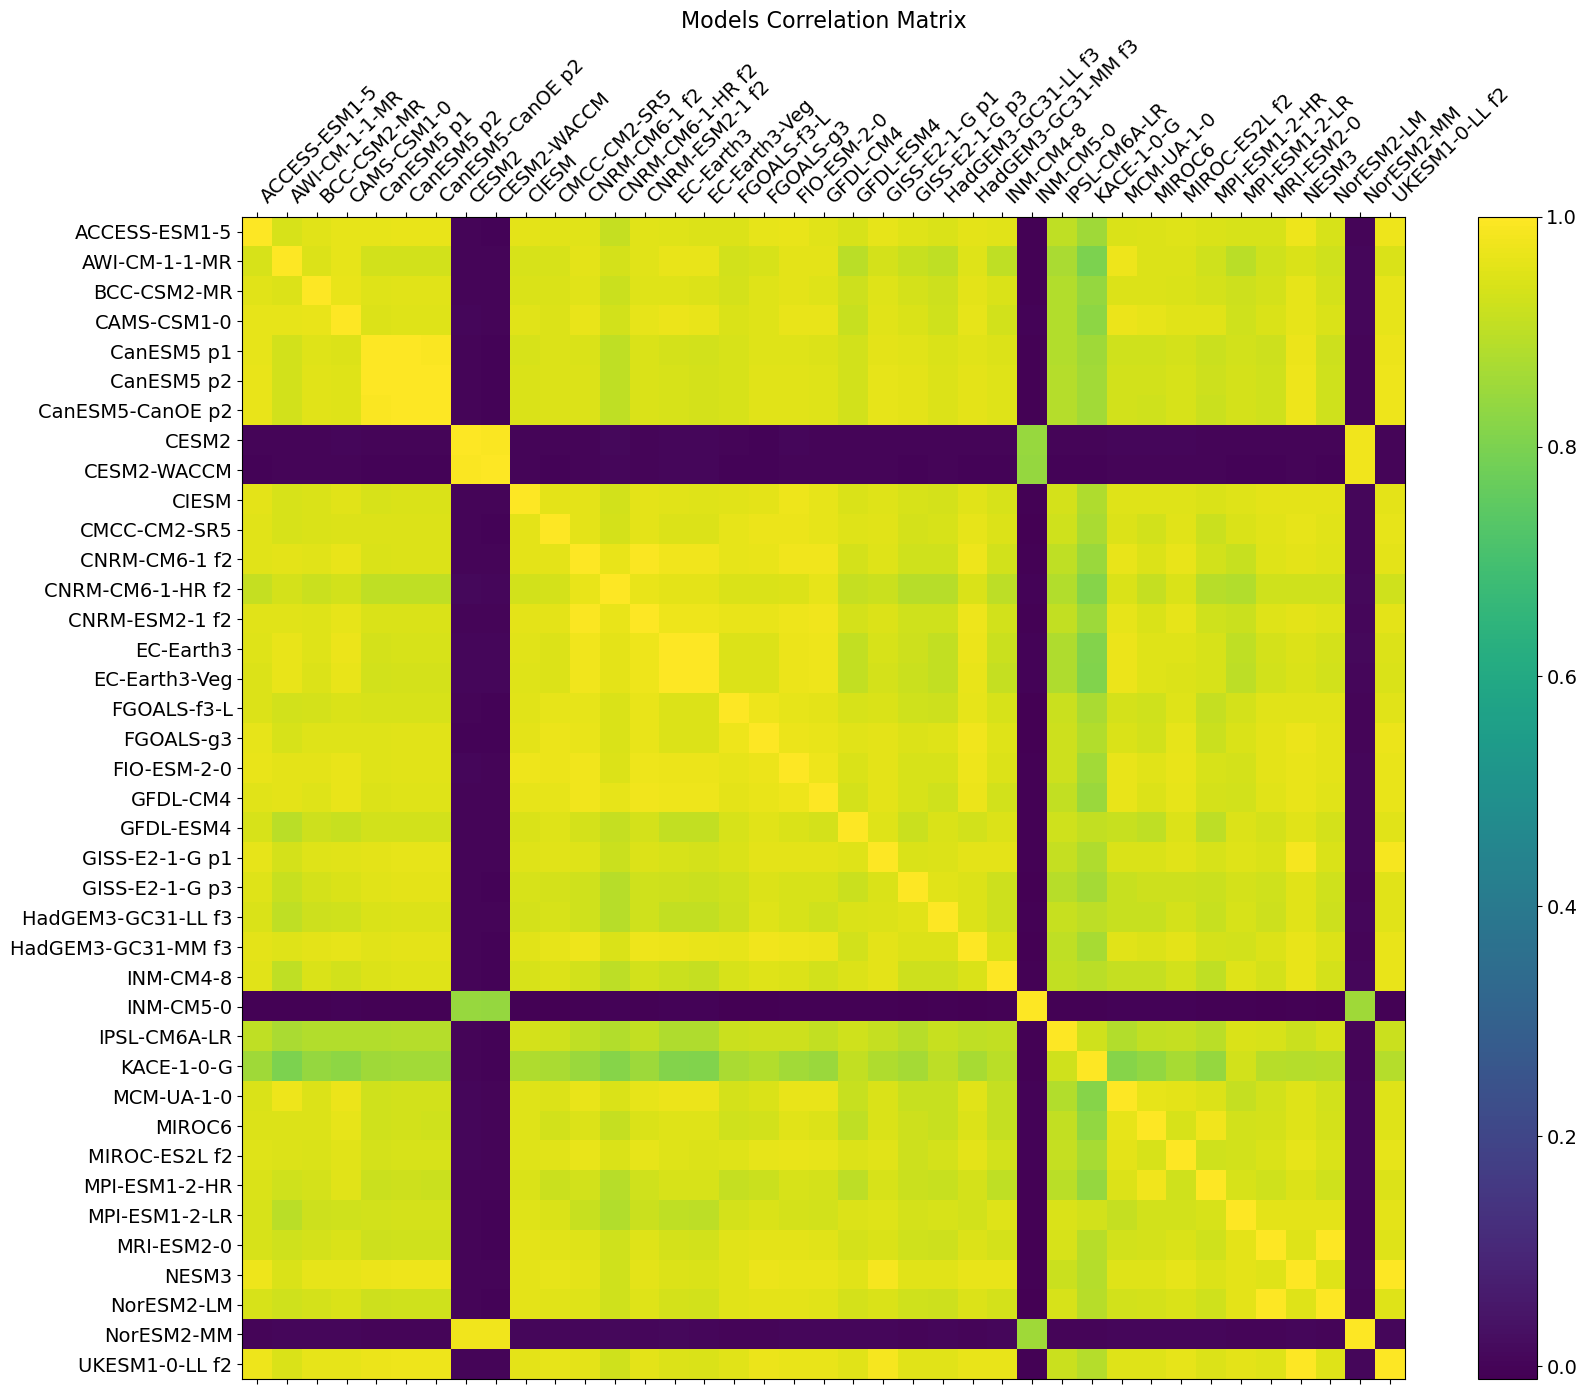

In [14]:
f = plt.figure(figsize=(19, 15))
plt.matshow(corr, fignum=f.number)
plt.xticks(range(corr.select_dtypes(['number']).shape[1]), corr.select_dtypes(['number']).columns, fontsize=14, rotation=45, ha='left')
plt.yticks(range(corr.select_dtypes(['number']).shape[1]), corr.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Models Correlation Matrix', fontsize=16);

In [20]:
pg.pairwise_corr(df, columns=['tas', 'tas2', 'tas3'])

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
0,tas,tas_2,pearson,two-sided,148200,0.940150,"[0.94, 0.94]",0.000000,inf,1.000000
1,tas,tas_3,pearson,two-sided,148200,0.956417,"[0.96, 0.96]",0.000000,nan,1.000000
2,tas,tas_4,pearson,two-sided,148200,0.962597,"[0.96, 0.96]",0.000000,nan,1.000000
3,tas,tas_5,pearson,two-sided,148200,0.963823,"[0.96, 0.96]",0.000000,nan,1.000000
4,tas,tas_6,pearson,two-sided,148200,0.966855,"[0.97, 0.97]",0.000000,nan,1.000000
5,tas,tas_7,pearson,two-sided,148200,0.966918,"[0.97, 0.97]",0.000000,nan,1.000000
6,tas,tas_8,pearson,two-sided,148200,0.001626,"[-0.0, 0.01]",0.531248,0.004,0.095978
7,tas,tas_9,pearson,two-sided,148200,-0.000877,"[-0.01, 0.0]",0.735794,0.003,0.063142
8,tas,tas_10,pearson,two-sided,148200,0.957152,"[0.96, 0.96]",0.000000,nan,1.000000
9,tas,tas_11,pearson,two-sided,148200,0.953196,"[0.95, 0.95]",0.000000,nan,1.000000


In [26]:
import numpy as np
edge_weight_diag = np.fill_diagonal(edge_weights.to_numpy(), 1)
edge_weight_diag

In [34]:
v = edge_weights.to_numpy().flatten()
p = pcorr.to_numpy().flatten()
p

array([ 1.        ,  0.03066288,  0.0094891 , ...,  0.01102672,
       -0.00586724,  1.        ])

(array([876.,  36.,  19.,  19., 143.,  47., 114.,  38.,   0.,  38.,  76.,
        115.]),
 array([-1.61522780e-30,  8.84282083e-02,  1.76856417e-01,  2.65284625e-01,
         3.53712833e-01,  4.42141042e-01,  5.30569250e-01,  6.18997458e-01,
         7.07425667e-01,  7.95853875e-01,  8.84282083e-01,  9.72710292e-01,
         1.06113850e+00]),
 <BarContainer object of 12 artists>)

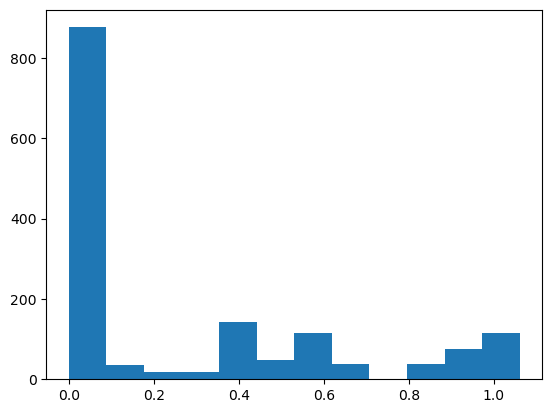

In [41]:
import matplotlib.pyplot as plt
plt.hist(v, bins='auto')

(array([ 0.21301775,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.10650888,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.10650888,
         0.        ,  0.31952663,  0.21301775,  0.2

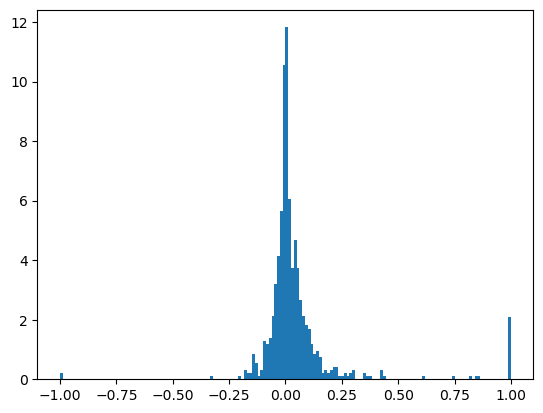

In [40]:
plt.hist(p, bins='auto', density=True)

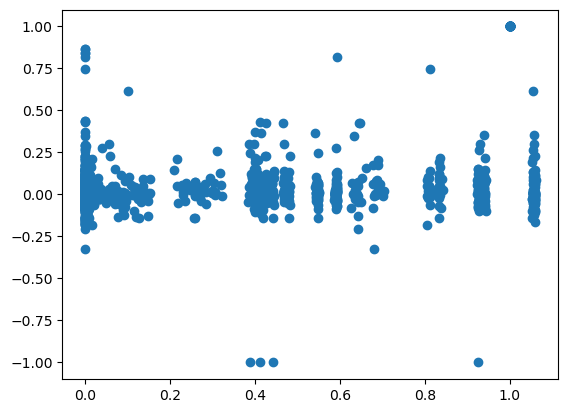

In [44]:
plt.scatter(v, p)